<a href="https://colab.research.google.com/github/karencfisher/COVID19/blob/main/image_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

BASE_PATH = '/content/drive/MyDrive/COVID-19_Radiography_Dataset'
!unzip -q /content/drive/MyDrive/COVID-19_Radiography_Dataset/data.zip

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import os
import random
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

#### Get metadata on training set 

In [ ]:
classes = ('normal', 'COVID')
data_path = 'data'

counts = []
filelists = []
for item in classes:
    filelist = os.listdir(os.path.join(data_path, 'train', item))
    filelists.append(filelist)
    counts.append(len(filelist))


#### Visualize samples of the image data by class

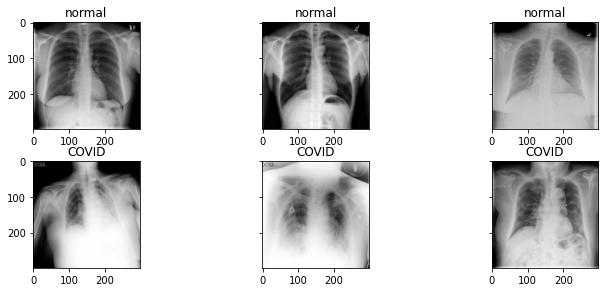

In [ ]:
f, axes = plt.subplots(len(classes), 3, sharey=True)
f.set_figwidth(10)
plt.tight_layout()

for i, item in enumerate(classes):
    images = random.sample(filelists[i], 3)
    for j, image in enumerate(images):
        img_file = os.path.join(data_path, 'train', item, image)
        img = plt.imread(img_file)
        axes[i][j].imshow(img, cmap='gray')
        axes[i][j].set_title(item)


In [ ]:
import cv2

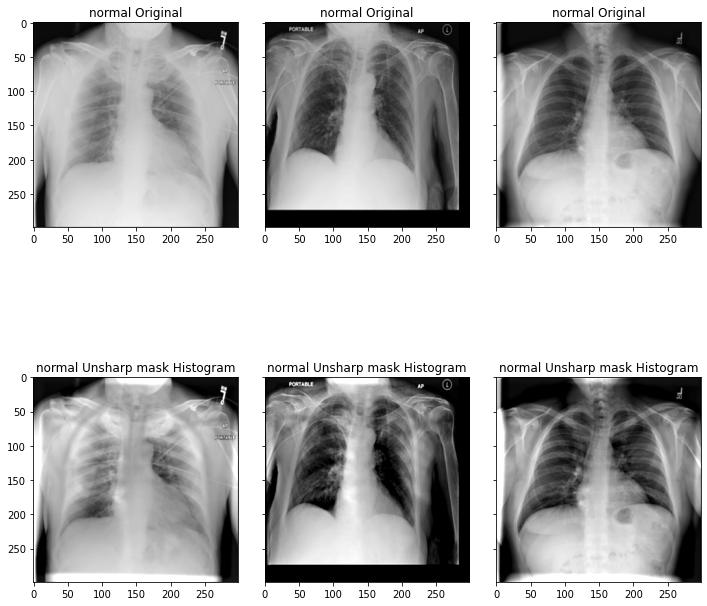

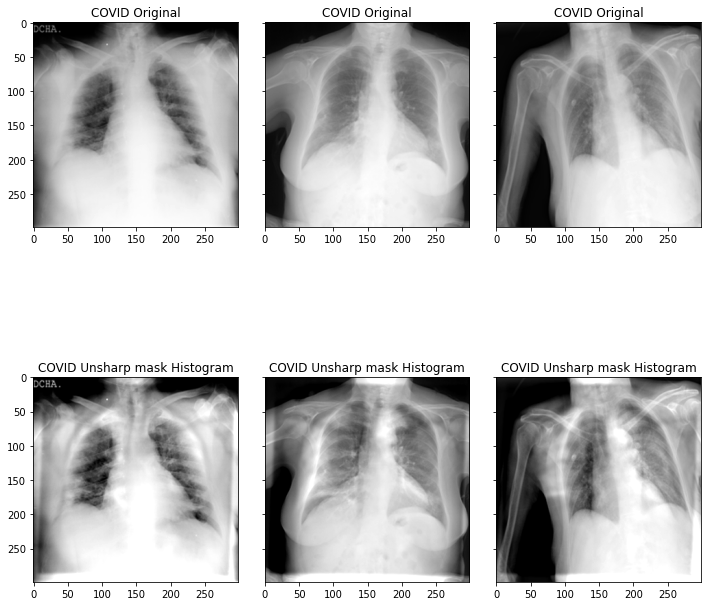

In [ ]:
for i, item in enumerate(classes):
  images = random.sample(filelists[i], 3)
  f, axes = plt.subplots(len(classes), 3, sharey=True, figsize=(10, 10))
  #f.set_figwidth(10)
  plt.tight_layout()

  for j, image in enumerate(images):
    img_file = os.path.join(data_path, 'train', item, image)
    img = cv2.imread(img_file)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    axes[0][j].imshow(img, cmap='gray')
    axes[0][j].set_title(f'{item} Original')

    gaussian_3 = cv2.GaussianBlur(img_clahe, (0, 0), 2.0)
    unsharp_image = cv2.addWeighted(img, 1.5, gaussian_3, -0.5, 0, img)
    axes[1][j].imshow(unsharp_image, cmap='gray')
    axes[1][j].set_title(f'{item} Unsharp mask Histogram')

#### Histogram Equalization

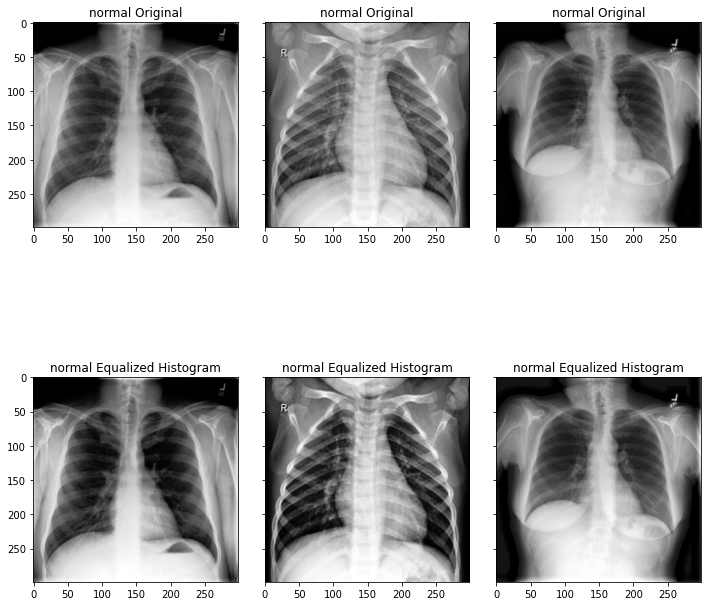

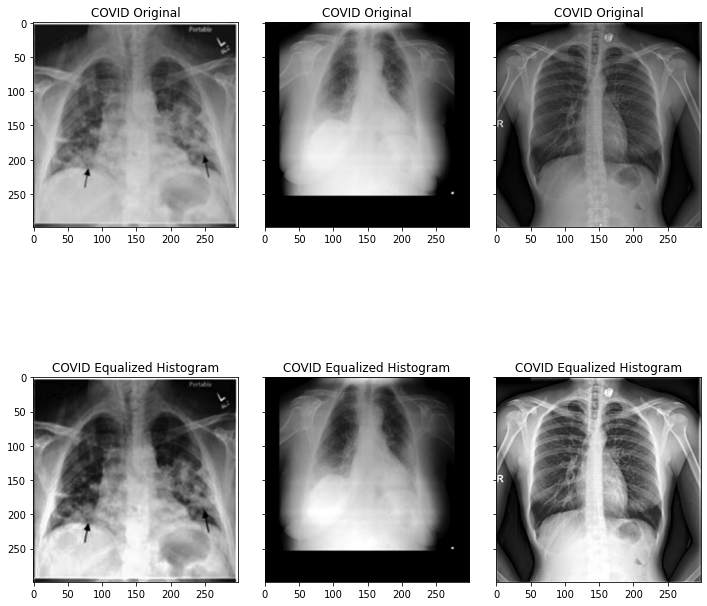

In [ ]:
for i, item in enumerate(classes):
  images = random.sample(filelists[i], 3)
  f, axes = plt.subplots(len(classes), 3, sharey=True, figsize=(10, 10))
  #f.set_figwidth(10)
  plt.tight_layout()

  for j, image in enumerate(images):
    img_file = os.path.join(data_path, 'train', item, image)
    img = cv2.imread(img_file)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    axes[0][j].imshow(img, cmap='gray')
    axes[0][j].set_title(f'{item} Original')

    equ = cv2.equalizeHist(img)
    axes[1][j].imshow(equ, cmap='gray')
    axes[1][j].set_title(f'{item} Equalized Histogram')

#### CLAHE (Contrast Limited Adaptive Histogram Equalization)

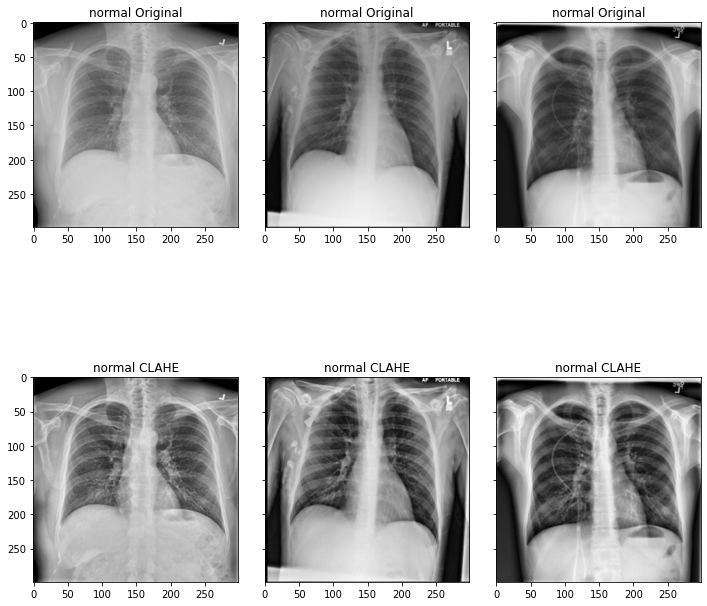

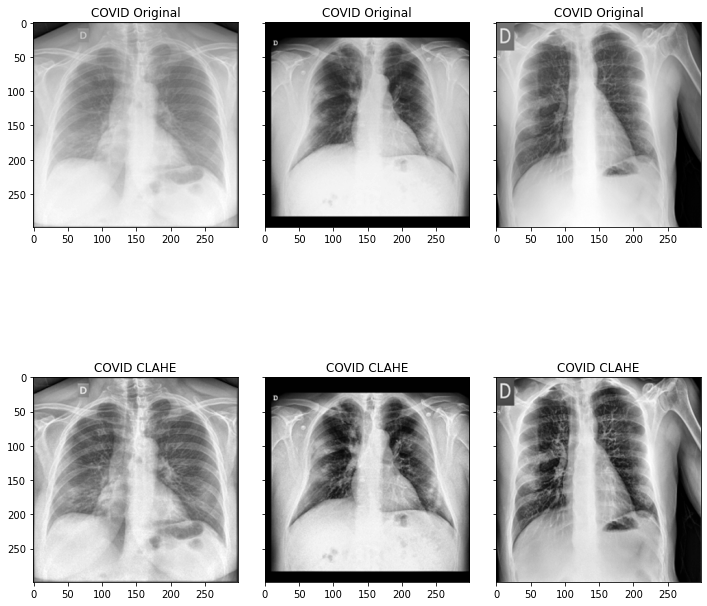

In [ ]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

for i, item in enumerate(classes):
  images = random.sample(filelists[i], 3)
  f, axes = plt.subplots(len(classes), 3, sharey=True, figsize=(10, 10))
  #f.set_figwidth(10)
  plt.tight_layout()

  for j, image in enumerate(images):
    img_file = os.path.join(data_path, 'train', item, image)
    img = cv2.imread(img_file)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    axes[0][j].imshow(img, cmap='gray')
    axes[0][j].set_title(f'{item} Original')

    img_clahe = clahe.apply(img)
    axes[1][j].imshow(img_clahe, cmap='gray')
    axes[1][j].set_title(f'{item} CLAHE')


In [ ]:
img_file = os.path.join(data_path, 'train', item, images[1])
img = cv2.imread(img_file)
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img_clahe = clahe.apply(img)

In [ ]:
img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
img_clahe

array([[3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       ...,
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3]], dtype=uint8)

In [ ]:
np.amax(img_clahe)

255